# Hypothesis 3: Persuasive Effect of Content Type

**Hypothesis:** LLM-generated content will have a weaker persuasive effect on participants’ opinions compared to human-written content.

This notebook's goal is to analyize the data in regards to the third hypothesis by comparing the opinion shifts per topic between the different content groups. 

### Load preprocessed data

To start, we'll import all relevant libraries needed to test this hypothesis and load the data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

from data_preprocessing import load_and_preprocess

# Load and preprocess data
df = load_and_preprocess('data/cleaned_file.csv')

### Create average scores per content type

In [3]:
# Thematic shift from Likert grid
climate_pre = ['BP03_03', 'BP03_05', 'BP03_06', 'BP03_08', 'BP03_09', 'BP03_10', 'BP03_14']
climate_post = ['FS09_03', 'FS09_05', 'FS09_06', 'FS09_08', 'FS09_09', 'FS09_10', 'FS09_14']
edu_pre = ['BP03_04', 'BP03_07', 'BP03_11', 'BP03_12', 'BP03_13']
edu_post = ['FS09_04', 'FS09_07', 'FS09_11', 'FS09_12', 'FS09_13']

df['climate_shift'] = df[climate_post].mean(axis=1) - df[climate_pre].mean(axis=1)
df['education_shift'] = df[edu_post].mean(axis=1) - df[edu_pre].mean(axis=1)

### Compare Groups (LLM VS. Human) using the ttest_ind function:

In [5]:
# T-tests by content type
shift_cols = ['climate_shift', 'education_shift']
for col in shift_cols:
    ai = df[df['content_type'] == 'AI'][col]
    human = df[df['content_type'] == 'Human'][col]
    stat, p = ttest_ind(ai, human)
    print(f"{col} – T-test:")
    print(f"t = {stat:.3f}, p = {p:.3f}\n")

climate_shift – T-test:
t = 0.589, p = 0.558

education_shift – T-test:
t = 2.459, p = 0.017



### Visualisation of the results

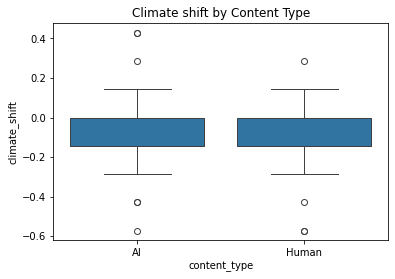

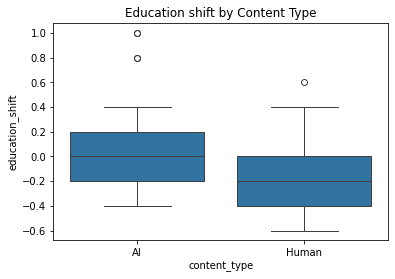

In [7]:
# Boxplots
for col in shift_cols:
    sns.boxplot(x='content_type', y=col, data=df)
    plt.title(f'{col.replace("_", " ").capitalize()} by Content Type')
    plt.show()

### Conclusion

A significant difference was found for education-related opinion shift (p < 0.05), with participants exposed to AI-generated content showing greater shifts. No difference was observed for climate-related items.